In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#import dataset67.65
user_df = pd.read_csv('User_SongFeatures_data.csv')

For our model we will randomly split the dataset into three. There will be two test data sets and one validation dataset. The first data set will be used to perform matrix factorization to extract user and item latent factors. The second dataset will be used to train our classification model. And lastly, our validation set will be used to evaluate our model. 

In [2]:
# split into train, train 2 and validation set
# make sure users who have only listened once is in train set

song_count = user_df.groupby('user_id').count()[['song_id']].reset_index()
one_timers = song_count[song_count['song_id'] == 1]
len(one_timers)

3355

In [3]:
# subset data of users who only listened one time
one_df = user_df[user_df.user_id.isin(one_timers.user_id)]

In [4]:
# subset rest of data
df = user_df[~user_df.user_id.isin(one_timers.user_id)]
len(df)

1139721

In [5]:
X = df.drop('listen_count', axis=1)
y = df.listen_count

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=1)

In [7]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

410299
455889
273533


In [8]:
train1 = X_train.join(y_train).append(one_df, ignore_index=True)
train2 = X_test.join(y_test)
val = X_val.join(y_val)

c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [9]:
print(len(train1))
print(len(train2))
print(len(val))

413654
455889
273533


In [10]:
# since there are songs with multiple ids with have to group by user id and song and sum the listen counts

train1_df = train1.groupby(['user_id','song'], as_index=False)['listen_count'].sum()
print(train1_df.user_id.nunique())
print(train1_df.song.nunique())

69433
5730


Before we perform non negative matrix factorization on our dataset we must first transform it into a matrix with user_id and song and the corresponding listen count. 

In [11]:
train1_df.head()

,user_id,song,listen_count
0,00003a4459f33b92906be11abe0e93efc423c0ff,Lights Of Ayodhya - Yulara,2
1,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,Ironmasters - The Men They Couldn't Hang,1
2,00030033e3a2f904a48ec1dd53019c9969b6ef1f,Chasing Cars - Snow Patrol,4
3,00030033e3a2f904a48ec1dd53019c9969b6ef1f,Secrets - OneRepublic,7
4,00030033e3a2f904a48ec1dd53019c9969b6ef1f,You'd Be So Nice To Come Home To - Julie London,1


In [12]:
mf_df = train1_df.pivot(index = 'user_id', columns ='song', values = 'listen_count').fillna(0)
mf_df.head()

song,& Down - Boys Noize,' Cello Song - Nick Drake,'97 Bonnie & Clyde - Eminem,'Round Midnight - Amy Winehouse,'Round Midnight - Miles Davis,(Antichrist Television Blues) - Arcade Fire,(I Just) Died In Your Arms - Cutting Crew,(If You're Wondering If I Want You To) I Want You To - Weezer,(Nice Dream) - Radiohead,(The Symphony Of) Blase' - Anberlin,...,and then patterns - Four Tet,clouding - Four Tet,high fives - Four Tet,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O'Riley,smile around the face - Four Tet,sun drums and soil - Four Tet,the Love Song - K-OS,you were there with me - Four Tet
user_id,,,,,,,,,,,,,,,,,,,,,
00003a4459f33b92906be11abe0e93efc423c0ff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00005c6177188f12fb5e2e82cdbd93e8a3f35e64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00030033e3a2f904a48ec1dd53019c9969b6ef1f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0007235c769e610e3d339a17818a5708e41008d9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000a5c8b4d8b2c98f7a205219181d039edcd4506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# turn into matrix

mf_df = mf_df.as_matrix()

c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


We will now perform non negative matrix factorization to extract latent factors from our matrix.

In [16]:
from sklearn.decomposition import NMF

model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(mf_df)
H = model.components_



# https://stackoverflow.com/questions/57370472/recommendation-system-with-matrix-factorization-for-huge-data-gives-memoryerror

In [17]:
W.shape

(69433, 10)

In [18]:
W

array([[2.62361000e-08, 1.04630209e-05, 0.00000000e+00, ...,
        6.30774592e-08, 1.14880615e-06, 1.78314408e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.91341773e-07, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.81770793e-06, 1.58709036e-05, 3.25581536e-05, ...,
        2.63296496e-06, 1.00488718e-05, 4.13811999e-05],
       [6.88949936e-06, 1.97262778e-04, 4.22463486e-05, ...,
        3.77046260e-06, 1.81885925e-05, 2.64355480e-05],
       [6.78425316e-07, 3.80015922e-04, 1.81686892e-05, ...,
        6.54042914e-06, 2.46008585e-05, 4.05038241e-06]])

In [19]:
H

array([[3.19153835e-06, 5.76014036e-07, 2.31415994e-07, ...,
        2.15879354e-07, 2.51439832e-07, 5.88695889e-08],
       [6.84836189e-05, 1.28583374e-05, 1.43496270e-05, ...,
        5.66031196e-06, 7.14322575e-04, 2.13036981e-06],
       [0.00000000e+00, 0.00000000e+00, 3.47518374e-07, ...,
        5.68970050e-05, 5.85055505e-06, 1.03107288e-06],
       ...,
       [1.11051648e-04, 4.41260734e-05, 1.27740902e-05, ...,
        1.48228392e-05, 1.47575270e-04, 5.56215000e-06],
       [9.42284469e-04, 1.33661459e-04, 2.71390624e-05, ...,
        2.05941198e-05, 4.34422603e-04, 3.36723046e-05],
       [3.58926327e-04, 4.62798583e-05, 7.81001531e-05, ...,
        7.66916359e-05, 1.71755967e-04, 2.85111261e-05]])

In [20]:
import numpy as np

user = pd.DataFrame(W, columns = ['u1','u2','u3','u4','u5','u6','u7', 'u8', 'u9', 'u10'])

song = pd.DataFrame(H).transpose()


In [21]:
user.head()

,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10
0,2.623610e-08,0.000010,0.000000,0.000063,0.000033,8.179591e-07,4.776140e-08,6.307746e-08,1.148806e-06,1.783144e-06
1,0.000000e+00,0.000000,0.000000,0.000224,0.000179,7.018952e-06,8.098909e-06,1.913418e-07,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000,0.000000,0.000000,0.554942,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,5.187643e-08,0.000007,0.000002,0.000013,0.000013,3.174982e-05,0.000000e+00,1.065642e-05,2.440372e-07,1.455525e-05
4,4.774565e-06,0.000001,0.000061,0.000007,0.000020,4.397258e-07,1.341314e-07,2.812454e-05,5.998986e-06,4.501213e-07


In [22]:
train1_df.user_id.unique()

array(['00003a4459f33b92906be11abe0e93efc423c0ff',
       '00005c6177188f12fb5e2e82cdbd93e8a3f35e64',
       '00030033e3a2f904a48ec1dd53019c9969b6ef1f', ...,
       'fffd6a2bdef646ce9898b628d5dd56c43df69a9d',
       'fffd9635b33f412de8ed02e44e6564e3644cf3c6',
       'fffea3d509760c984e7d40789804c0e5e289cc86'], dtype=object)

Now we will append the user and song latent factors found to our original dataset. 

In [23]:
# add latent factors as new columns

user_factors = pd.DataFrame(train1_df.user_id.unique()).join(user)
user_factors.columns = ['user_id','u1','u2','u3','u4','u5','u6','u7', 'u8', 'u9', 'u10']

user_factors.head()


,user_id,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10
0,00003a4459f33b92906be11abe0e93efc423c0ff,2.623610e-08,0.000010,0.000000,0.000063,0.000033,8.179591e-07,4.776140e-08,6.307746e-08,1.148806e-06,1.783144e-06
1,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,0.000000e+00,0.000000,0.000000,0.000224,0.000179,7.018952e-06,8.098909e-06,1.913418e-07,0.000000e+00,0.000000e+00
2,00030033e3a2f904a48ec1dd53019c9969b6ef1f,0.000000e+00,0.000000,0.000000,0.000000,0.554942,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0007235c769e610e3d339a17818a5708e41008d9,5.187643e-08,0.000007,0.000002,0.000013,0.000013,3.174982e-05,0.000000e+00,1.065642e-05,2.440372e-07,1.455525e-05
4,000a5c8b4d8b2c98f7a205219181d039edcd4506,4.774565e-06,0.000001,0.000061,0.000007,0.000020,4.397258e-07,1.341314e-07,2.812454e-05,5.998986e-06,4.501213e-07


In [24]:
song_factors = pd.DataFrame(train1_df.song.unique(), columns = ['song']).join(song)
song_factors.columns = ['song','s1','s2','s3','s4','s5','s6','s7', 's8', 's9', 's10']
song_factors.head()


,song,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
0,Lights Of Ayodhya - Yulara,3.191538e-06,0.000068,0.000000e+00,0.000792,0.001970,0.033226,0.000022,0.000111,0.000942,0.000359
1,Ironmasters - The Men They Couldn't Hang,5.760140e-07,0.000013,0.000000e+00,0.000074,0.000267,0.000065,0.000220,0.000044,0.000134,0.000046
2,Chasing Cars - Snow Patrol,2.314160e-07,0.000014,3.475184e-07,0.000074,0.000536,0.000108,0.000003,0.000013,0.000027,0.000078
3,Secrets - OneRepublic,2.150105e-07,0.000003,1.503472e-04,0.000411,0.000970,0.000040,0.000001,0.000015,0.000044,0.000069
4,You'd Be So Nice To Come Home To - Julie London,8.043883e-07,0.000027,4.225389e-06,0.000143,0.000420,0.000109,0.000009,0.000280,0.001303,0.000122


In [25]:
train2_df = pd.merge(train2, user_factors, on='user_id')

In [26]:
train2_df = pd.merge(train2_df, song_factors, on='song')

In [27]:
len(train2_df)

443454

In [28]:
train2_df.head()

,user_id,song_id,title,release,artist_name,year,song,id,name,uri_x,...,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
0,f1ccb26d0d49490016747f6592e6f7b1e53a9e54,SODXVXU12AF729E02B,grey room,9,damien rice,2006,Grey Room - Damien Rice,7qSSjZr6Lm9j1sBle4X0b1,grey room,spotify:track:7qSSjZr6Lm9j1sBle4X0b1,...,1.353074e-07,0.000051,0.000024,0.000044,0.001171,0.000017,0.000003,0.000043,0.000005,0.000064
1,e20a32284cd5057d914813261587daef0646902f,SODXVXU12AF729E02B,grey room,9,damien rice,2006,Grey Room - Damien Rice,7qSSjZr6Lm9j1sBle4X0b1,grey room,spotify:track:7qSSjZr6Lm9j1sBle4X0b1,...,1.353074e-07,0.000051,0.000024,0.000044,0.001171,0.000017,0.000003,0.000043,0.000005,0.000064
2,28b191426861422cbfb837d0c0843faf413465cb,SODXVXU12AF729E02B,grey room,9,damien rice,2006,Grey Room - Damien Rice,7qSSjZr6Lm9j1sBle4X0b1,grey room,spotify:track:7qSSjZr6Lm9j1sBle4X0b1,...,1.353074e-07,0.000051,0.000024,0.000044,0.001171,0.000017,0.000003,0.000043,0.000005,0.000064
3,02f988e5c3b8313719d05c2d84d2c6ee70f04212,SODXVXU12AF729E02B,grey room,9,damien rice,2006,Grey Room - Damien Rice,7qSSjZr6Lm9j1sBle4X0b1,grey room,spotify:track:7qSSjZr6Lm9j1sBle4X0b1,...,1.353074e-07,0.000051,0.000024,0.000044,0.001171,0.000017,0.000003,0.000043,0.000005,0.000064
4,bac559ba85b95bad5dfe9bb381a794714aae1ef4,SODXVXU12AF729E02B,grey room,9,damien rice,2006,Grey Room - Damien Rice,7qSSjZr6Lm9j1sBle4X0b1,grey room,spotify:track:7qSSjZr6Lm9j1sBle4X0b1,...,1.353074e-07,0.000051,0.000024,0.000044,0.001171,0.000017,0.000003,0.000043,0.000005,0.000064


In [29]:
train2_df.columns

Index(['user_id', 'song_id', 'title', 'release', 'artist_name', 'year', 'song',
       'id', 'name', 'uri_x', 'acousticness', 'analysis_url', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'type', 'uri_y', 'valence', 'listen_count', 'u1', 'u2',
       'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 's1', 's2', 's3', 's4',
       's5', 's6', 's7', 's8', 's9', 's10'],
      dtype='object')

In [30]:
df.listen_count.describe()

count    1.139721e+06
mean     2.877347e+00
std      6.173287e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      2.213000e+03
Name: listen_count, dtype: float64

Since this is a classification problem, we will transform listen_count into labels of 'one' and 'one_plus'.

In [31]:
def f(row):
    if  row['listen_count'] == 1:
        val = 'one'
    else:
        val ='one_plus'
    return val

In [32]:
train2_df['label'] = train2_df.apply(f, axis=1)

In [33]:
# extract relevant columns for classification

train2_X = train2_df[['acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature','valence','s1', 's2', 's3', 's4', 's5', 's6','s7','s8', 's9', 's10', 'u1','u2','u3','u4','u5','u6','u7','u8', 'u9', 'u10']]

In [34]:
len(train2_X)

443454

In [35]:
# extract labels
train2_y = train2_df['label']

In [36]:
# merge user and song latent factors to validation set

val_df = pd.merge(val, user_factors, on='user_id')
val_df = pd.merge(val_df, song_factors, on='song')
val_df['label'] = val_df.apply(f, axis=1)

In [37]:
val_X = val_df[['acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature','valence','s1', 's2', 's3', 's4', 's5', 's6','s7','s8', 's9', 's10', 'u1','u2','u3','u4','u5','u6','u7','u8', 'u9', 'u10']]

In [38]:
val_X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10
0,0.00237,0.52,253587,0.852,0.000058,0,0.0733,-5.866,1,0.0543,...,0.000007,0.000786,0.000100,0.000629,0.000713,0.000098,0.000034,0.000058,0.000429,0.000065
1,0.00237,0.52,253587,0.852,0.000058,0,0.0733,-5.866,1,0.0543,...,0.000000,0.008853,0.803736,0.000000,0.679982,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00237,0.52,253587,0.852,0.000058,0,0.0733,-5.866,1,0.0543,...,0.000025,0.001352,0.000337,0.003962,0.002397,0.002370,0.000249,0.002196,0.002407,0.000239
3,0.00237,0.52,253587,0.852,0.000058,0,0.0733,-5.866,1,0.0543,...,0.000133,0.000814,0.000299,0.001512,0.004008,0.000930,0.000059,0.000194,0.000250,0.000251
4,0.00237,0.52,253587,0.852,0.000058,0,0.0733,-5.866,1,0.0543,...,0.000026,0.000000,0.000000,0.211885,0.000000,0.000000,0.000000,0.000000,0.000296,0.000000


In [39]:
train2_X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10
0,0.431,0.326,343573,0.224,0.000022,0,0.095,-11.376,1,0.0345,...,3.640479e-05,0.005080,0.000300,0.009681,0.004525,0.000530,0.000244,0.000295,0.000493,0.000201
1,0.431,0.326,343573,0.224,0.000022,0,0.095,-11.376,1,0.0345,...,4.125249e-07,0.000076,0.000122,0.000044,0.000114,0.000173,0.000007,0.000021,0.000030,0.000055
2,0.431,0.326,343573,0.224,0.000022,0,0.095,-11.376,1,0.0345,...,5.055671e-05,0.003013,0.001001,0.003345,0.012688,0.000403,0.000070,0.000086,0.000481,0.000269
3,0.431,0.326,343573,0.224,0.000022,0,0.095,-11.376,1,0.0345,...,3.643850e-06,0.000441,0.000205,0.000371,0.001191,0.000047,0.000022,0.000046,0.000123,0.000077
4,0.431,0.326,343573,0.224,0.000022,0,0.095,-11.376,1,0.0345,...,1.685373e-05,0.000670,0.000644,0.000590,0.001114,0.000043,0.000712,0.000062,0.000115,0.000145


In [40]:
val_y = val_df['label']

Now we will train XGBoost.

In [41]:
#XGBOOST TRAINING ACCURACY

from xgboost import XGBClassifier
from sklearn.metrics import (classification_report,confusion_matrix, accuracy_score, f1_score, roc_auc_score)

xgb = XGBClassifier()
xgb.fit(train2_X, train2_y)
xgb_pred = xgb.predict(train2_X)
y_pred = xgb.predict_proba(train2_X)[:,1]


print('\n Confusion Matrix:\n',confusion_matrix(train2_y,xgb_pred))
print("\n Classification Report: \n", classification_report(train2_y, xgb_pred))
print("Accuracy:", (accuracy_score(train2_y,xgb_pred)))
print("AUC Score:", (roc_auc_score(train2_y,y_pred)))


 Confusion Matrix:
 [[232566  25173]
 [150404  35311]]

 Classification Report: 
               precision    recall  f1-score   support

         one       0.61      0.90      0.73    257739
    one_plus       0.58      0.19      0.29    185715

   micro avg       0.60      0.60      0.60    443454
   macro avg       0.60      0.55      0.51    443454
weighted avg       0.60      0.60      0.54    443454

Accuracy: 0.604069418699572
AUC Score: 0.6047116191682879


In [42]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

In [43]:
# XGBoost TEST accuracy
xgb_pred2 = xgb.predict(val_X)
y_pred2 = xgb.predict_proba(val_X)[:,1]

print('\n Confusion Matrix:\n',confusion_matrix(val_y,xgb_pred2))
print("\n Classification Report: \n", classification_report(val_y, xgb_pred2))
print("Accuracy:", (accuracy_score(val_y,xgb_pred2)))
print("AUC Score:", (roc_auc_score(val_y,y_pred2)))



 Confusion Matrix:
 [[138893  15504]
 [ 90207  21445]]

 Classification Report: 
               precision    recall  f1-score   support

         one       0.61      0.90      0.72    154397
    one_plus       0.58      0.19      0.29    111652

   micro avg       0.60      0.60      0.60    266049
   macro avg       0.59      0.55      0.51    266049
weighted avg       0.60      0.60      0.54    266049

Accuracy: 0.6026634191445936
AUC Score: 0.6025561415646159


### Feature Importance

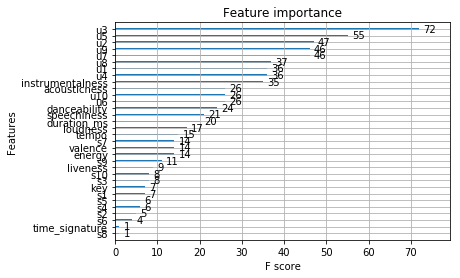

In [44]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(xgb)
plt.show()

In [45]:
## remove least important features 

xgb_f = XGBClassifier()
xgb_f.fit(train2_X.drop(['mode','s8', 'time_signature','s6','s2', 's4','s5','s1','key'], axis = 1), train2_y)

xgb_pred2 = xgb_f.predict(val_X.drop(['mode','s8', 'time_signature','s6', 's2','s4','s5','s1','key'], axis = 1))
y_pred2 = xgb_f.predict_proba(val_X.drop(['mode','s8', 'time_signature', 's6', 's2','s4','s5','s1','key'], axis = 1))[:,1]

print('\n Confusion Matrix:\n',confusion_matrix(val_y,xgb_pred2))
print("\n Classification Report: \n", classification_report(val_y, xgb_pred2))
print("Accuracy:", (accuracy_score(val_y,xgb_pred2)))
print("AUC Score:", (roc_auc_score(val_y,y_pred2)))


 Confusion Matrix:
 [[138486  15911]
 [ 89809  21843]]

 Classification Report: 
               precision    recall  f1-score   support

         one       0.61      0.90      0.72    154397
    one_plus       0.58      0.20      0.29    111652

   micro avg       0.60      0.60      0.60    266049
   macro avg       0.59      0.55      0.51    266049
weighted avg       0.59      0.60      0.54    266049

Accuracy: 0.6026295907896666
AUC Score: 0.6028964748833556


Now we will play with the hyperparameter to see if we can increase AUC. 

In [46]:


xgb2 = XGBClassifier(subsample=0.6, colsample_bytree=0.6, max_depth=8, learning_rate=0.01, n_estimators=1000 )
xgb2.fit(train2_X.drop(['mode','s8', 'time_signature','s6','s2', 's4','s5','s1','key'], axis = 1), train2_y)
xgb_pred3 = xgb2.predict(val_X.drop(['mode','s8', 'time_signature','s6', 's2','s4','s5','s1','key'], axis = 1))
y_pred3 = xgb2.predict_proba(val_X.drop(['mode','s8', 'time_signature','s6', 's2','s4','s5','s1','key'], axis = 1))[:,1]


print('\n Confusion Matrix:\n',confusion_matrix(val_y,xgb_pred3))
print("\n Classification Report: \n", classification_report(val_y, xgb_pred3))
print("Accuracy:", (accuracy_score(val_y,xgb_pred3)))
print("AUC Score:", (roc_auc_score(val_y,y_pred3)))


 Confusion Matrix:
 [[135949  18448]
 [ 80153  31499]]

 Classification Report: 
               precision    recall  f1-score   support

         one       0.63      0.88      0.73    154397
    one_plus       0.63      0.28      0.39    111652

   micro avg       0.63      0.63      0.63    266049
   macro avg       0.63      0.58      0.56    266049
weighted avg       0.63      0.63      0.59    266049

Accuracy: 0.6293878195370026
AUC Score: 0.6573547849596929


In [47]:
train2_X = train2_X.drop(['mode','s8', 'time_signature','s6','s2', 's4','s5','s1','key'], axis = 1)
val_X = val_X.drop(['mode','s8', 'time_signature','s6','s2', 's4','s5','s1','key'], axis = 1)

Now lets train Random Forest.

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()
rfclf.fit(train2_X, train2_y)

y_pred = rfclf.predict(val_X)
class_pred = rfclf.predict_proba(val_X)[:,1]

print('\n Confusion Matrix:\n',confusion_matrix(val_y,y_pred))
print("\n Classification Report: \n", classification_report(val_y, y_pred))
print("Accuracy:", (accuracy_score(val_y,y_pred)))
print("AUC Score:", (roc_auc_score(val_y,class_pred)))

c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



 Confusion Matrix:
 [[123733  30664]
 [ 72938  38714]]

 Classification Report: 
               precision    recall  f1-score   support

         one       0.63      0.80      0.70    154397
    one_plus       0.56      0.35      0.43    111652

   micro avg       0.61      0.61      0.61    266049
   macro avg       0.59      0.57      0.57    266049
weighted avg       0.60      0.61      0.59    266049

Accuracy: 0.6105905303158441
AUC Score: 0.6162147863427505


In [49]:
rfclf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Tune hyperparameters to see if we can increase AUC.

In [50]:
rfclf2 = RandomForestClassifier(n_estimators=100)
rfclf2.fit(train2_X, train2_y)
y_pred2 = rfclf2.predict(val_X)
class_pred2 = rfclf2.predict_proba(val_X)[:,1]

print('\n Confusion Matrix:\n',confusion_matrix(val_y,y_pred2))
print("\n Classification Report: \n", classification_report(val_y, y_pred2))
print("Accuracy:", (accuracy_score(val_y,y_pred2)))
print("AUC Score:", (roc_auc_score(val_y,class_pred2)))


 Confusion Matrix:
 [[127792  26605]
 [ 68975  42677]]

 Classification Report: 
               precision    recall  f1-score   support

         one       0.65      0.83      0.73    154397
    one_plus       0.62      0.38      0.47    111652

   micro avg       0.64      0.64      0.64    266049
   macro avg       0.63      0.60      0.60    266049
weighted avg       0.64      0.64      0.62    266049

Accuracy: 0.6407428706741991
AUC Score: 0.6693191671391756


Ensemble our RF and XGBoost models by averaging probabilities. 

In [51]:
## average probabilities of two models

# get probabilities of random forest binary classifier
x = xgb2.predict_proba(val_X)

# get probabilities of SVM binary classifier
r = rfclf2.predict_proba(val_X)

In [52]:
#add index to probabilities so we can merge
x = pd.DataFrame(data=x, index=val_X.index)
r = pd.DataFrame(data=r, index=val_X.index)


# build a dataframe of probabilities (averaged)
P = pd.DataFrame(index=val_X.index)
for i in P.index:
    try:
        P.loc[i,0] = (x.loc[i,0] + r.loc[i,0])/2
        P.loc[i,1] = (x.loc[i,1] + r.loc[i,1])/2
    except KeyError:
        P.loc[i,:] = x.loc[i,:]

In [53]:
P

,0,1
0,0.623546,0.376454
1,0.534630,0.465370
2,0.536514,0.463486
3,0.615245,0.384755
4,0.675414,0.324586
5,0.301794,0.698206
6,0.649396,0.350604
7,0.517473,0.482527
8,0.478909,0.521091
9,0.603489,0.396511


In [54]:
val_y.head()

0    one_plus
1    one_plus
2         one
3         one
4    one_plus
Name: label, dtype: object

Now lets see if the ensemble increases our AUC.

In [55]:
# get new auc score
def pred_class(row):
    if row[1] > row[0]:
        return 'one_plus'
    else:
        return 'one'

P['pred'] = P.apply(lambda row: pred_class(row), axis =1)
new_pred_y = P['pred']

print('\n Confusion Matrix:\n',confusion_matrix(val_y,new_pred_y))
print("\n Classification Report: \n", classification_report(val_y, new_pred_y))
print("Accuracy:", (accuracy_score(val_y,new_pred_y)))
print("AUC Score:", (roc_auc_score(val_y,P[1])))


 Confusion Matrix:
 [[133648  20749]
 [ 74306  37346]]

 Classification Report: 
               precision    recall  f1-score   support

         one       0.64      0.87      0.74    154397
    one_plus       0.64      0.33      0.44    111652

   micro avg       0.64      0.64      0.64    266049
   macro avg       0.64      0.60      0.59    266049
weighted avg       0.64      0.64      0.61    266049

Accuracy: 0.64271619137828
AUC Score: 0.6763542848048626


Now we will write a function that will print out top 10 songs for a user

In [56]:
def get_top_songs(user_id):
    
    # get songs user has listened to 
    listened_songs = train2_df[train2_df.user_id == user_id].song.unique()
    
    # get songs user has not listened to 
    songs = train2_df.drop(columns=['user_id','listen_count']).drop_duplicates('song')
    not_listened = songs[~songs.song.isin(listened_songs)].drop(columns=['u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7','label'])
    not_listened['user_id'] = user_id
    
    # join user features and song features on songs not listened to
    not_listened_df = not_listened.merge(user_factors, on = 'user_id')
    
    
    # add probabilities of belonging to class 'one_plus'
    not_listened_df['pred']= P.iloc[:,1]
    
    # get top 10 predictions
    top_pred = not_listened_df.sort_values(by ='pred', ascending=False).head(5)
    return top_pred[['song_id', 'song', 'pred']]

In [57]:
get_top_songs('f1ccb26d0d49490016747f6592e6f7b1e53a9e54')

,song_id,song,pred
3067,SOBJYFB12AB018372D,Also Frightened - Animal Collective,0.909438
4239,SOBNAMV12A8C139423,Faces In The Hall - Gym Class Heroes,0.908345
3573,SOKJQGO12AF72ACA9F,Top Down - Swizz Beatz,0.908042
3489,SORWJSF12A8C138AB6,Hello - Evanescence,0.897374
4282,SOWSORU12A8C13D020,Yin Yang - Jarabe De Palo,0.890913


In [58]:
train2_df[train2_df.user_id == 'f1ccb26d0d49490016747f6592e6f7b1e53a9e54'].sort_values(by='listen_count', ascending=False)[['song','listen_count','label']]

,song,listen_count,label
1323,Sweet home Alabama - Lynyrd Skynyrd,11,one_plus
989,Woods - Bon Iver,6,one_plus
1841,Who Can Compare - Foolish Things,6,one_plus
1196,Lonelily - Damien Rice,4,one_plus
2459,Over You - Roxy Music,4,one_plus
862,Cannonball - Damien Rice,4,one_plus
812,Cheers Darlin' - Damien Rice,4,one_plus
1027,Amie - Damien Rice,3,one_plus
1288,The Lighthouse's Tale - Nickel Creek,3,one_plus
1706,Older Chests - Damien Rice,3,one_plus
